## Wine Reviews
Given a description in a wine review, predict the quality of the wine reviewed.

### Data Sources

Source: Kaggle [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("christopheiv/winemagdata130k")

print("Path to dataset files:", path)

Path to dataset files: /Users/patrick/.cache/kagglehub/datasets/christopheiv/winemagdata130k/versions/1


## Exploratory Data Analysis

**Libraries**

In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [3]:
fname = 'winemag-data-130k-v2.csv'
reviews = pd.read_csv(os.path.join(path, fname), index_col=0)
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Univariate Analysis

**Missing Data**

In [4]:
reviews.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

**Observations**

Most wine reviews include winery, variety, points, price, title, description, and country. Also important is the vintage, or year the wine is made. For a given wine, some years are better than others. We will drop any reviews that are missing any of these critical values. The vintage is included in the text of the `title` field and will need to be extracted as a separate feature.

#### Extract vintage year from `title`

In [5]:
import re

title_pattern = re.compile(r'\D(19[0-9]{2}|20[0-9]{2})')

# extract vintage year from title, if it exists
def vintage(title):
  m = title_pattern.findall(title)
  if len(m) > 0:
    m = title_pattern.findall(title)
    m.sort()
    return int(m[-1])
  return None


In [6]:
reviews['year'] = reviews.title.apply(vintage)
reviews[['title', 'year']]

,title,year
0,Nicosia 2013 Vulkà Bianco (Etna),2013.0
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),2011.0
2,Rainstorm 2013 Pinot Gris (Willamette Valley),2013.0
3,St. Julian 2013 Reserve Late Harvest Riesling ...,2013.0
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,2012.0
...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,2013.0
129967,Citation 2004 Pinot Noir (Oregon),2004.0
129968,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,2013.0
129969,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),2012.0


In [7]:
reviews.info()
reviews.nunique()


<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   125345 non-null  float64
dtypes: float64(2), int64(1), object(11)
memor

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
year                         59
dtype: int64

In [8]:
reviews.query('year < 1975')[['title', 'year']]

,title,year
12860,Wiese & Krohn 1964 Branco Colheita (Port),1964.0
16331,Taylor Fladgate 1967 Single Harvest (Port),1967.0
36196,Blandy's 1969 Bual (Madeira),1969.0
41441,Kopke 1935 Colheita White (Port),1935.0
45000,Blandy's 1973 Verdelho (Madeira),1973.0
45034,Kopke 1965 Special Edition Tawny (Port),1965.0
46010,Taylor Fladgate 1968 Single Harvest (Port),1968.0
51898,"Bodegas Toro Albala, SL 1947 Don PX Reserva Es...",1947.0
52636,Dow's 1963 Vintage (Port),1963.0
54748,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,1927.0


In [9]:
reviews.describe()


,points,price,year
count,129971.000000,120975.000000,125345.000000
mean,88.447138,35.363389,2010.681551
std,3.039730,41.022218,3.671918
min,80.000000,4.000000,1904.000000
25%,86.000000,17.000000,2009.000000
50%,88.000000,25.000000,2011.000000
75%,91.000000,42.000000,2013.000000
max,100.000000,3300.000000,2017.000000


No outliers. Data ranges seem appropriate

#### Missing Values
Only keep rows that contain the critical information.

In [10]:
mask = reviews.title.notna()
mask &= reviews.description.notna()
mask &= reviews.year.notna()
mask &= reviews.variety.notna()
mask &= reviews.winery.notna()
mask &= reviews.country.notna()
mask &= reviews.province.notna()
mask &= reviews.points.notna()
mask &= reviews.price.notna()
reviews[mask].info()
reviews[mask].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 116765 entries, 1 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                116765 non-null  object 
 1   description            116765 non-null  object 
 2   designation            82291 non-null   object 
 3   points                 116765 non-null  int64  
 4   price                  116765 non-null  float64
 5   province               116765 non-null  object 
 6   region_1               97703 non-null   object 
 7   region_2               49540 non-null   object 
 8   taster_name            93203 non-null   object 
 9   taster_twitter_handle  88387 non-null   object 
 10  title                  116765 non-null  object 
 11  variety                116765 non-null  object 
 12  winery                 116765 non-null  object 
 13  year                   116765 non-null  float64
dtypes: float64(2), int64(1), object(11)
memor

country                      0
description                  0
designation              34474
points                       0
price                        0
province                     0
region_1                 19062
region_2                 67225
taster_name              23562
taster_twitter_handle    28378
title                        0
variety                      0
winery                       0
year                         0
dtype: int64

#### Duplicate Values

In [11]:
reviews[mask].nunique()

country                      42
description              107675
designation               34053
points                       21
price                       389
province                    415
region_1                   1194
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    107345
variety                     682
winery                    15464
year                         59
dtype: int64

**Unique quality categories**

In [12]:
np.unique(reviews[mask].points)

array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100])

**21** unique point categories ranging from `80` to `100`

**Observations**: there appear to be several duplicated wine titles

Find reviews with duplicate titles

In [13]:
reviews[mask].groupby('title')[['description']].count().sort_values('description',ascending=False).query('description > 1')

,description
title,
Vignerons des Pierres Dorées 2015 Salamandre d'Or (Coteaux Bourguignons),4
Domaine Vacheron 2015 Sancerre,4
Château Lestage Simon 2012 Haut-Médoc,4
Cass 2015 Viognier (Paso Robles),3
Castillo Clavijo 2008 Crianza (Rioja),3
...,...
Boas Quintas 2014 Quinta da Fonte do Ouro Reserva Especial Touriga Nacional (Dão),2
Board Track Racer 2015 The Chief Cabernet Sauvignon (Columbia Valley (WA)),2
Board Track Racer 2010 The Vincent Red (Washington),2


Explore the most duplicated title

In [14]:
reviews[mask].query('title == "Vignerons des Pierres Dorées 2015 Salamandre d\'Or  (Coteaux Bourguignons)"')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
42319,France,This soft wine features attractive citrus and ...,Salamandre d'Or,86,15.0,Burgundy,Coteaux Bourguignons,NaN,Roger Voss,@vossroger,Vignerons des Pierres Dorées 2015 Salamandre d...,Chardonnay,Vignerons des Pierres Dorées,2015.0
54245,France,From the area known as Pierres Dorées because ...,Salamandre d'Or,86,15.0,Burgundy,Coteaux Bourguignons,NaN,Roger Voss,@vossroger,Vignerons des Pierres Dorées 2015 Salamandre d...,Gamay,Vignerons des Pierres Dorées,2015.0
56313,France,From the area known as Pierres Dorées because ...,Salamandre d'Or,86,15.0,Burgundy,Coteaux Bourguignons,NaN,Roger Voss,@vossroger,Vignerons des Pierres Dorées 2015 Salamandre d...,Gamay,Vignerons des Pierres Dorées,2015.0
96825,France,This soft wine features attractive citrus and ...,Salamandre d'Or,86,15.0,Burgundy,Coteaux Bourguignons,NaN,Roger Voss,@vossroger,Vignerons des Pierres Dorées 2015 Salamandre d...,Chardonnay,Vignerons des Pierres Dorées,2015.0


In [15]:
reviews[mask].query('title == "Vignerons des Pierres Dorées 2015 Salamandre d\'Or  (Coteaux Bourguignons)"').describe()

,points,price,year
count,4.0,4.0,4.0
mean,86.0,15.0,2015.0
std,0.0,0.0,0.0
min,86.0,15.0,2015.0
25%,86.0,15.0,2015.0
50%,86.0,15.0,2015.0
75%,86.0,15.0,2015.0
max,86.0,15.0,2015.0


Some wines appear to have been reviewed multiple times. Some of the descriptions may differ slightly, but the price and points appear to be consistent.

*Decision*: Drop duplicate titles

In [16]:
reviews[mask].drop_duplicates('title').info()
reviews[mask].drop_duplicates('title').nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 107345 entries, 1 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                107345 non-null  object 
 1   description            107345 non-null  object 
 2   designation            75742 non-null   object 
 3   points                 107345 non-null  int64  
 4   price                  107345 non-null  float64
 5   province               107345 non-null  object 
 6   region_1               89840 non-null   object 
 7   region_2               45775 non-null   object 
 8   taster_name            84977 non-null   object 
 9   taster_twitter_handle  80592 non-null   object 
 10  title                  107345 non-null  object 
 11  variety                107345 non-null  object 
 12  winery                 107345 non-null  object 
 13  year                   107345 non-null  float64
dtypes: float64(2), int64(1), object(11)
memor

country                      42
description              107319
designation               34053
points                       21
price                       384
province                    415
region_1                   1194
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    107345
variety                     682
winery                    15464
year                         59
dtype: int64

In [17]:
reviews[mask].drop_duplicates('title').describe()

,points,price,year
count,107345.000000,107345.000000,107345.000000
mean,88.450892,35.741069,2010.629401
std,3.099116,42.057882,3.741922
min,80.000000,4.000000,1904.000000
25%,86.000000,17.000000,2009.000000
50%,88.000000,25.000000,2011.000000
75%,91.000000,42.000000,2013.000000
max,100.000000,3300.000000,2017.000000


In [18]:
# verify one copy of duplicate reviews remains in the data set after dropping duplicates
reviews[mask].drop_duplicates('title').query('title == "Vignerons des Pierres Dorées 2015 Salamandre d\'Or  (Coteaux Bourguignons)"')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
42319,France,This soft wine features attractive citrus and ...,Salamandre d'Or,86,15.0,Burgundy,Coteaux Bourguignons,NaN,Roger Voss,@vossroger,Vignerons des Pierres Dorées 2015 Salamandre d...,Chardonnay,Vignerons des Pierres Dorées,2015.0


#### Taster Information

In [19]:
# reviews where taster name is provided but no twitter handle
reviews[mask].drop_duplicates('title')[(reviews[mask].drop_duplicates('title').taster_name.notnull()&reviews[mask].drop_duplicates('title').taster_twitter_handle.isnull())]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013.0
15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking,2013.0
19,US,"Red fruit aromas pervade on the nose, with cig...",NaN,87,32.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Meritage (Virginia),Meritage,Quiévremont,2012.0
20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,US,While blossom and melon aromas on this Gewürzt...,NaN,90,22.0,New York,North Fork of Long Island,Long Island,Anna Lee C. Iijima,NaN,Coffee Pot Cellars 2014 Gewurztraminer (North ...,Gewürztraminer,Coffee Pot Cellars,2014.0
129910,Germany,"Sun-kissed nectarine, tangerine and grapefruit...",Bernkasteler Lay Kabinett,91,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. Loosen 2015 Bernkasteler Lay Kabinett Ries...,Riesling,Dr. Loosen,2015.0
129911,Germany,"Dusty pollen and mineral notes lend spicy, sav...",Ürziger Würzgarten Kabinett,91,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. Loosen 2015 Ürziger Würzgarten Kabinett Ri...,Riesling,Dr. Loosen,2015.0
129946,Germany,"Plump, clingy peach and honey notes are cut wi...",Dom,90,17.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Bischöfliche Weingüter Trier 2013 Dom Riesling...,Riesling,Bischöfliche Weingüter Trier,2013.0


In [20]:
# reviews where twitter handle is provided but no taster name
reviews[mask].drop_duplicates('title')[(reviews[mask].drop_duplicates('title').taster_name.isnull()&reviews[mask].drop_duplicates('title').taster_twitter_handle.notnull())]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year


**Conclusion**: `taster_twitter_handle` can be dropped. Does not carry any new information

#### Location Information

In [21]:
reviews[mask].drop_duplicates('title')[['winery', 'country', 'province', 'region_1', 'region_2']]

,winery,country,province,region_1,region_2
1,Quinta dos Avidagos,Portugal,Douro,NaN,NaN
2,Rainstorm,US,Oregon,Willamette Valley,Willamette Valley
3,St. Julian,US,Michigan,Lake Michigan Shore,NaN
4,Sweet Cheeks,US,Oregon,Willamette Valley,Willamette Valley
5,Tandem,Spain,Northern Spain,Navarra,NaN
...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef),Germany,Mosel,NaN,NaN
129967,Citation,US,Oregon,Oregon,Oregon Other
129968,Domaine Gresser,France,Alsace,Alsace,NaN
129969,Domaine Marcel Deiss,France,Alsace,Alsace,NaN


**Observations**

The `winery` and `country` data appear to be pretty good. `Province` data in some places like US appear to be informative, while in places like Spain, the province is not as informative as the `region_1`. `region_1` and `region_2` fields appear to be often duplicative or marginally informative.

Strategy, use `winery` and `country` as is, and coalesce the `province`, `region_1`, and `region_2` fields into a single location field to identify the wine region locality within the country.

**US Wineries**

In [22]:
# look at US locations
reviews[mask].drop_duplicates('title').query('country == "US"').groupby('province')[['winery']].count()

,winery
province,
America,48
Arizona,32
California,32881
Colorado,60
Connecticut,3
Idaho,173
Iowa,2
Kentucky,1
Massachusetts,5


**Explore the** *Washington-Oregon* **province**

In [23]:
reviews[mask].drop_duplicates('title').query('country == "US" and province == "Washington-Oregon"')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
12542,US,"A blend of grapes from Washington and Oregon, ...",56% Washington/44% Oregon,88,17.0,Washington-Oregon,NaN,NaN,Paul Gregutt,@paulgwine,J. Scott Cellars 2012 56% Washington/44% Orego...,Sauvignon Blanc,J. Scott Cellars,2012.0
28791,US,"Quince, lime and white peach fruit flavors sug...",56% Oregon/44% Washington,88,19.0,Washington-Oregon,NaN,NaN,Paul Gregutt,@paulgwine,J. Scott Cellars 2012 56% Oregon/44% Washingto...,Roussanne,J. Scott Cellars,2012.0
78492,US,"Using grapes from both sides of the Columbia, ...",NaN,89,18.0,Washington-Oregon,NaN,NaN,Paul Gregutt,@paulgwine,J. Scott Cellars 2011 Roussanne (Washington-Or...,Roussanne,J. Scott Cellars,2011.0
92162,US,"Washington Roussanne, which is two thirds of t...",NaN,88,18.0,Washington-Oregon,NaN,NaN,Paul Gregutt,@paulgwine,J. Scott Cellars 2009 Roussanne (Washington-Or...,Roussanne,J. Scott Cellars,2009.0
92164,US,This brings a boatload of flavor for the price...,Mirth,88,9.0,Washington-Oregon,NaN,NaN,Paul Gregutt,@paulgwine,Corvidae 2008 Mirth Chardonnay (Washington-Ore...,Chardonnay,Corvidae,2008.0
96806,US,In this cool vintage the Celilo vineyard was n...,73% Washington/27% Oregon,90,30.0,Washington-Oregon,NaN,NaN,Paul Gregutt,@paulgwine,Ken Wright 2009 73% Washington/27% Oregon Char...,Chardonnay,Ken Wright,2009.0


**Other Wineries**

**Use `region_1` value when province includes country name, like** *Northern Spain*

In [24]:
reviews.loc[mask,'location'] = reviews[mask].apply(lambda row: row.region_1 if row.country in row.province else row.province, axis=1)
reviews[mask].drop_duplicates('title')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,location
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,Oregon
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,Michigan
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,Oregon
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011.0,Navarra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013.0,Mosel
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004.0,Oregon
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013.0,Alsace
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012.0,Alsace


**Replace provinces like** *Sicily & Sardinia* **with `region_1` value**

In [25]:
reviews[mask].drop_duplicates('title')[reviews[mask].drop_duplicates('title').province.str.contains('&')]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,location
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013.0,Sicily & Sardinia
22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,2007.0,Sicily & Sardinia
24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,2009.0,Sicily & Sardinia
26,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari,2013.0,Sicily & Sardinia
27,Italy,"Aromas recall ripe dark berry, toast and a whi...",NaN,87,10.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari,2013.0,Sicily & Sardinia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129852,Italy,Here's an easy blend of Cabernet Sauvignon and...,NaN,86,10.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,MandraRossa 2006 Cabernet Sauvignon-Shiraz (Si...,Cabernet Sauvignon-Shiraz,MandraRossa,2006.0,Sicily & Sardinia
129943,Italy,"A blend of Nero d'Avola and Syrah, this convey...",Adènzia,90,29.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio del Cristo di Campobello 2012 Adènzia R...,Red Blend,Baglio del Cristo di Campobello,2012.0,Sicily & Sardinia
129947,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",Symposio,90,20.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Feudo Principi di Butera,2012.0,Sicily & Sardinia
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS,2013.0,Sicily & Sardinia


In [26]:
reviews.loc[reviews.province.notna() & reviews.province.str.contains('&'),'location'] = reviews[reviews.province.notna() & reviews.province.str.contains('&')].apply(lambda row: row.region_1, axis=1)
reviews[mask].drop_duplicates('title')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,location
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,Oregon
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,Michigan
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,Oregon
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011.0,Navarra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013.0,Mosel
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004.0,Oregon
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013.0,Alsace
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012.0,Alsace


**Explore location values**

In [27]:
reviews[mask].drop_duplicates('title').location.describe()

count         106992
unique           719
top       California
freq           32881
Name: location, dtype: object

In [28]:
reviews[mask].drop_duplicates('title').location.unique()

array(['Douro', 'Oregon', 'Michigan', 'Navarra', 'Vittoria', 'Alsace',
       'Rheinhessen', 'California', 'Mosel', 'Other', 'Mendoza Province',
       'Ribera del Duero', 'Virginia', 'Sicilia', 'Terre Siciliane',
       'Cerasuolo di Vittoria', 'Colchagua Valley', 'Puglia',
       'Beaujolais', 'Maule Valley', 'Monica di Sardegna', 'Bordeaux',
       'Maipo Valley', 'Washington', 'Romagna', 'Burgundy',
       'Aglianico del Vulture', 'South Australia', 'Rapel Valley',
       'Galicia', 'Vin de France', 'McLaren Vale', 'Tuscany',
       'Burgenland', 'New York', 'Leyda Valley', 'Piedmont', 'Padthaway',
       'Stellenbosch', 'Simonsberg-Stellenbosch', 'Alentejano',
       'Dominio de Valdepusa', 'Cahors', 'Aconcagua Valley', 'Madiran',
       'Loncomilla Valley', 'Marlborough', 'Alto Adige',
       'Casablanca Valley', 'Campania', 'Veneto', 'Western Cape',
       'Judean Hills', 'Alentejo', 'Coastal Region', 'Rhône Valley',
       'Rueda', 'Galilee', 'Beira Atlantico', 'Tokaj',
       

**Replace locations** *Other* **with `region_1` value**

In [29]:
reviews.loc[reviews.location == 'Other', 'location'] = reviews.loc[reviews.location == 'Other'].region_1

In [30]:
reviews[mask].drop_duplicates('title')[reviews[mask].drop_duplicates('title').location.isna()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,location
1135,Chile,Prickly aromas of nettle are simple as well as...,Reserva Casillero del Diablo,84,11.0,Chile,NaN,NaN,Michael Schachner,@wineschach,Concha y Toro 2015 Reserva Casillero del Diabl...,Sauvignon Blanc,Concha y Toro,2015.0,NaN
2292,Slovenia,Earthy with hints of roasted nuts and dried he...,Fosilni Breg,84,20.0,Slovenia,NaN,NaN,Anna Lee C. Iijima,NaN,Ciringa 2011 Fosilni Breg Sauvignon Blanc (Slo...,Sauvignon Blanc,Ciringa,2011.0,NaN
2734,Chile,Apple and citrus aromas are neither well defin...,Vitral,86,11.0,Chile,NaN,NaN,Michael Schachner,@wineschach,Viña Maipo 2015 Vitral Chardonnay (Chile),Chardonnay,Viña Maipo,2015.0,NaN
2747,Romania,"Aromas of black plum, black cherry, green bram...",Legendary Estate Series,86,9.0,Romania,NaN,NaN,Jeff Jenssen,@worldwineguys,Cramele Recas 2014 Legendary Estate Series Cab...,Cabernet Sauvignon,Cramele Recas,2014.0,NaN
2748,Romania,"Pineapple, citrus blossom, and white peach aro...",Legendary Estate Series,86,9.0,Romania,NaN,NaN,Jeff Jenssen,@worldwineguys,Cramele Recas 2014 Legendary Estate Series Pin...,Pinot Grigio,Cramele Recas,2014.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129403,Bulgaria,"At $8, this is a great find, and has the exoti...",NaN,85,8.0,Bulgaria,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Targovishte 2006 Sauvignon Blanc (Bulgaria),Sauvignon Blanc,Targovishte,2006.0,NaN
129436,Uruguay,"Jammy aromas of floral berry fruits, lavender ...",Varietals,87,20.0,Uruguay,NaN,NaN,Michael Schachner,@wineschach,Garzón 2014 Varietals Tannat (Uruguay),Tannat,Garzón,2014.0,NaN
129437,Uruguay,"A mix of tropical fruit, peach pit and apple a...",Reserva,87,17.0,Uruguay,NaN,NaN,Michael Schachner,@wineschach,Garzón 2016 Reserva Albariño (Uruguay),Albariño,Garzón,2016.0,NaN
129621,Ukraine,Fresh apple notes on the nose of this off-dry ...,KrimSekt White Collection Semi-Dry,84,13.0,Ukraine,NaN,NaN,Anna Lee C. Iijima,NaN,Artemovsk 2008 KrimSekt White Collection Semi-...,Sparkling Blend,Artemovsk,2008.0,NaN


### Data Cleansing Summary

- dropped `taster_twitter_handle` column because it does not contain any new information
- dropped `designation` column, too many missing values
- extract vintage (`year`) from title
- dropped rows with missing critical values in these columns: `winery`, `variety`, `points`, `price`, `title`, `description`, `year`, and `country`
- dropped rows with duplicate `titles`
- generated `location` column from the `province`, `region_1`, `region_2` columns. All wineries have country value. Not all wineries have the additional location value to identify a more specific wine region.
- features are
  - `variety`
  - `title`
  - `description`
  - `winery`
  - geographical location: `country`, `location`
  - taster: `taster_name`
- targets
  - `points` (quality), classification
  - `price` (cost), regression

In [31]:
categorical_features = ['title', 'variety', 'winery', 'description', 'country', 'location', 'taster_name']
categorical_features

['title',
 'variety',
 'winery',
 'description',
 'country',
 'location',
 'taster_name']

In [32]:
numerical_features = reviews.select_dtypes(np.number).columns.to_list()
numerical_features

['points', 'price', 'year']

#### Clean Dataset

In [33]:
wine_df = reviews[mask].drop_duplicates('title')[categorical_features + numerical_features]
wine_df.info()
wine_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 107345 entries, 1 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   title        107345 non-null  object 
 1   variety      107345 non-null  object 
 2   winery       107345 non-null  object 
 3   description  107345 non-null  object 
 4   country      107345 non-null  object 
 5   location     106992 non-null  object 
 6   taster_name  84977 non-null   object 
 7   points       107345 non-null  int64  
 8   price        107345 non-null  float64
 9   year         107345 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 9.0+ MB


,title,variety,winery,description,country,location,taster_name,points,price,year
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"This is ripe and fruity, a wine that is smooth...",Portugal,Douro,Roger Voss,87,15.0,2011.0
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"Tart and snappy, the flavors of lime flesh and...",US,Oregon,Paul Gregutt,87,14.0,2013.0
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"Pineapple rind, lemon pith and orange blossom ...",US,Michigan,Alexander Peartree,87,13.0,2013.0
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"Much like the regular bottling from 2012, this...",US,Oregon,Paul Gregutt,87,65.0,2012.0
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Blackberry and raspberry aromas show a typical...,Spain,Navarra,Michael Schachner,87,15.0,2011.0


#### Targets

### Multivariate Analysis

#### Price-Point relationship

<Axes: xlabel='points', ylabel='price'>

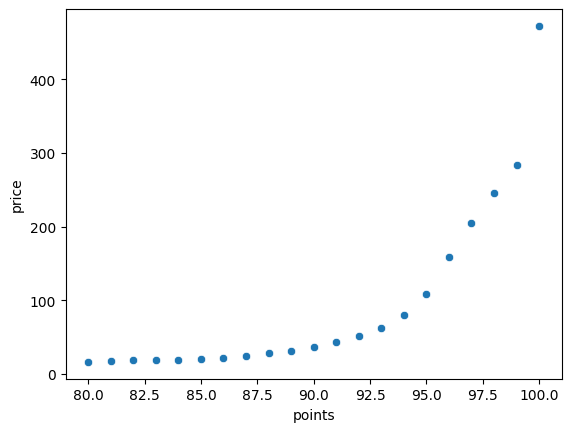

In [34]:
sns.scatterplot(wine_df.groupby('points')[['price']].mean(), x='points', y='price')

There is a clear relationship between the points a wine gets, and the expected price for the wine.

#### Reviewer-Point relationship

In [35]:
raise(NotImplementedError())

NotImplementedError: 

In [ ]:
sns.pairplot(reviews[mask].drop_duplicates('title')[numerical_features + ['taster_name']])

In [ ]:
categorical_features = reviews.select_dtypes(object).columns.drop(['description']).to_list()
categorical_features

In [ ]:
reviews.columns[reviews.nunique() < 50]

In [ ]:
# Set up the plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
axes = axes.flatten()

# Plotting the distribution of each categorical feature with respect to Revenue
for i, col in enumerate(reviews.columns[reviews.nunique() < 50].drop(['taster_twitter_handle', 'points'])):
    sns.countplot(x=col, hue='taster_name', data=reviews[reviews.columns[reviews.nunique() < 50].drop(['taster_twitter_handle', 'points'])], ax=axes[i], palette='cubehelix')
    axes[i].set_title(f'Distribution of {col} by Reviewer')
    axes[i].legend(title='Reviewer', loc='upper right')
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# X = wine_df.drop(columns=['points', 'price'])
# X.info()
# X.head()
# y = wine_df[['points', 'price']]
# y

## Feature Extraction

In [ ]:
import nltk

nltk.download('all')

In [ ]:
reviews[['description']].sample(10)

In [ ]:
import wordcloud as wc


# Function for display frquency of words
def freq_words(words, title=""):
    """
    Show frequency of words as an image
    """
    # Generate frequency of words as an image
    freq_words_img = wc.WordCloud(background_color="white", random_state=2).generate(
        words
    )
    print(freq_words_img.words_)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(freq_words_img)
    plt.axis("off")
    plt.show()

In [ ]:
review = next(
    reviews[["title", "description"]].sample(1, random_state=925).itertuples()
)

freq_words(review.description, review.title)

In [ ]:
desc = reviews["description"]
desc.head(10)

In [ ]:
from utils.text_utils import remove_num_punc, remove_stop_words, lemmatize_words

review = next(
    reviews[["title", "description"]].sample(1, random_state=925).itertuples()
)

desc = pd.Series(review.description)
desc = desc.apply(remove_num_punc)
desc = desc.apply(remove_stop_words)
desc = desc.apply(lemmatize_words)

freq_words(desc.values[0], review.title)